## Paris Housing Class

Description
All attributes are numeric variables and they are listed bellow:

1) squareMeters

2) numberOfRooms

3) hasYard

4) hasPool

5) floors - number of floors

6) cityCode - zip code

7) cityPartRange - the higher the range, the more exclusive the neighbourhood is

8) numPrevOwners - number of prevoious owners

9) made - year

10) isNewBuilt

11) hasStormProtector

12) basement - basement square meters

13) attic - attic square meteres

14) garage - garage size

15) hasStorageRoom

16) hasGuestRoom - number of guest rooms

17) price - price of a house

18) category - Luxury or Basic

**Dalam Notebook ini saya akan membuat prediksi menggunakan Supervised Learning yaitu Regression dan Classification, Regression ini akan memprediksi harga dari Paris Housing dengan menggunakan label 'Price', untuk Classification ini akan menggunakan label 'Category' yang mempunyai value apakah Rumah itu Basic(Umum) atau Luxury(Mewah)**.

**Daftar Isi** :

1) Data Pre-Processing

2) Exploratory Data Analysis

3) Feature Engineering

4) Data Modelling : Classification

5) Data Modelling : Regression

6) Kesimpulan

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [133]:
# Import dataset dengan nama df
df = pd.read_csv('ParisHousingClass.csv')
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [4]:
# Melihat info nama-nama fitur
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

In [5]:
# Melihat info sekilas semua fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [7]:
# Melihat data statistik deksriptif 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0


In [9]:
# Drop fitur category di df_num (data frame numeric)
df_num = df.drop(columns=['category'])

In [11]:
def summary_table(df): #function to create an added information regarding the dataset
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes, #display datatype
                                  null = df.isna().sum(), #sum of null values
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),#how many percente null values
                                  unique = df.nunique(),  #cek for number of unique values
                                  uniqueSample = [list(df[i].sample(3).drop_duplicates()) for i in df.columns] #3 random samples
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

In [12]:
# Melihat ringkasan dari data null dan unique value
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,squareMeters,int64,0,0.0,9483,"[60216, 41832, 77346]",94.83
1,numberOfRooms,int64,0,0.0,100,"[6, 70, 38]",1.00
2,hasYard,int64,0,0.0,2,"[1, 0]",0.02
3,hasPool,int64,0,0.0,2,"[1, 0]",0.02
4,floors,int64,0,0.0,100,"[29, 34]",1.00
5,cityCode,int64,0,0.0,9509,"[59060, 57749, 2552]",95.09
6,cityPartRange,int64,0,0.0,10,"[9, 5, 10]",0.10
7,numPrevOwners,int64,0,0.0,10,"[2, 4]",0.10
8,made,int64,0,0.0,32,"[1994, 1998, 2017]",0.32
9,isNewBuilt,int64,0,0.0,2,[1],0.02


Data sangat bersih dengan terlihat tidak ada data null/missing value

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


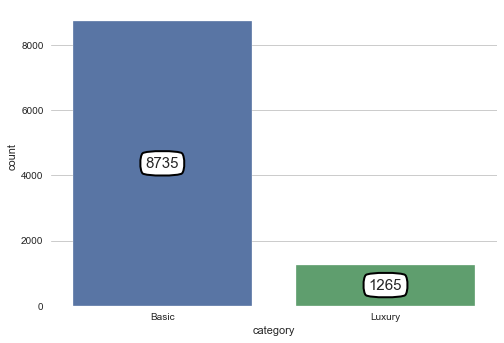

In [135]:
# Melihat jumlah di fitur category
plots = sns.countplot(df['category'])
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.4", fc="w", ec="black", lw=2),
                   textcoords='offset points')

Fitur Category ini terlihat tidak seimbang antara Rumah dengan tipe Basic(Umum) dengan Luxury(Mewah) dengan perbandingan antara 8:1

Untuk Classification ini tentunya nanti label imbalanced ini bisa diatasi dengan RandomUnderSampler, RandomOverSampler, SMOTE

In [22]:
# Melihat korelasi semua fitur dengan fitur category
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
isNewBuilt          -0.010643
garage              -0.017229
Name: price, dtype: float64

In [14]:
# Cek apakah ada data duplikasi
df.duplicated().any()

False

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

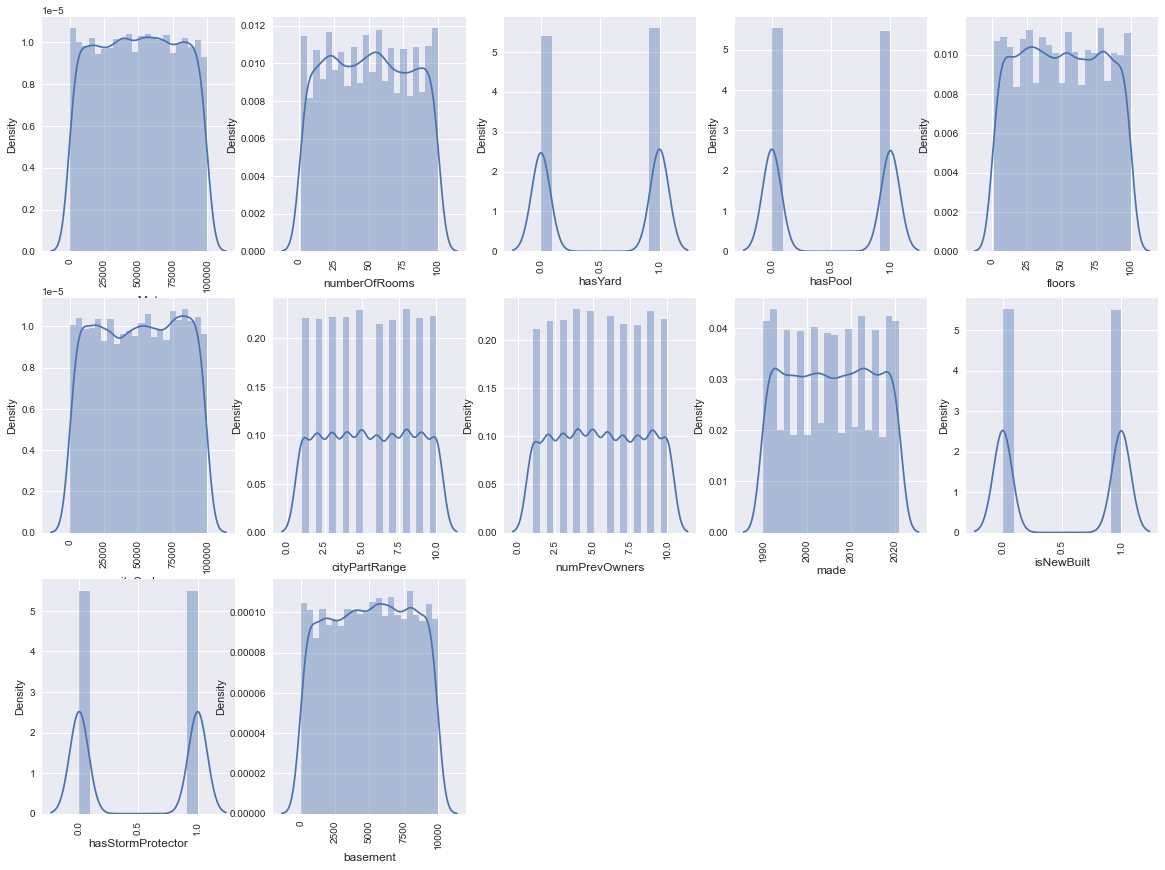

In [19]:
# Melihat Distribusi Normal dari tiap fitur
plt.figure(figsize = (20, 25))
feature_num = 1
for i in df_num:
    if feature_num < 13:
        ax = plt.subplot(5, 5, feature_num)
        sns.distplot(df_num[i])
        plt.xlabel(i, fontsize = 12)
        plt.xticks(rotation=90)
    feature_num += 1
plt.show()

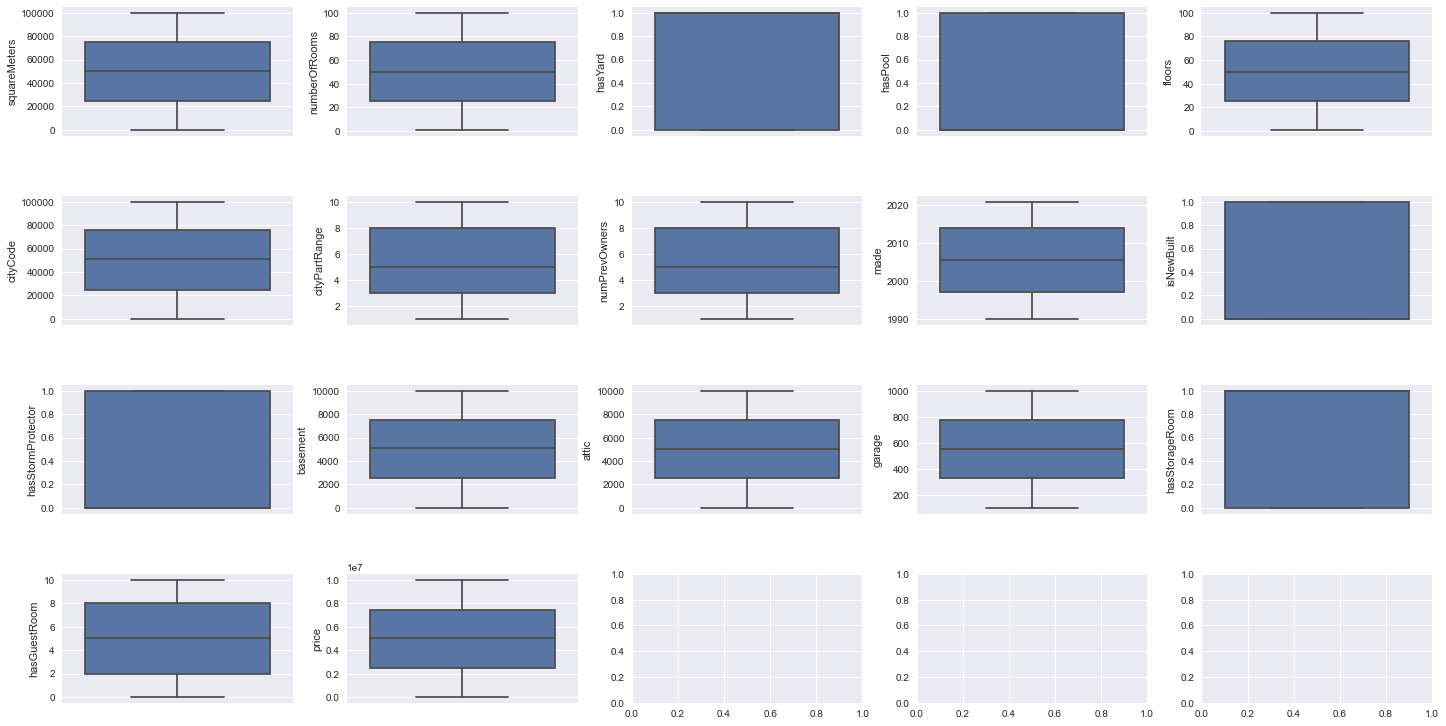

In [23]:
# Melihat apakah ada data outlier
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df_num.items():
    sns.boxplot(y=k, data=df_num, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Dari Distribusi Normal dan Cek Outlier terlihat sudah cukup baik

In [24]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,squareMeters,int64,0,0.0,9483,"[79182, 95800, 91180]",94.83
1,numberOfRooms,int64,0,0.0,100,"[27, 48, 93]",1.00
2,hasYard,int64,0,0.0,2,"[0, 1]",0.02
3,hasPool,int64,0,0.0,2,"[0, 1]",0.02
4,floors,int64,0,0.0,100,"[8, 69, 13]",1.00
5,cityCode,int64,0,0.0,9509,"[95559, 65901, 49663]",95.09
6,cityPartRange,int64,0,0.0,10,"[3, 10, 9]",0.10
7,numPrevOwners,int64,0,0.0,10,"[1, 7]",0.10
8,made,int64,0,0.0,32,"[2000, 2003, 2018]",0.32
9,isNewBuilt,int64,0,0.0,2,[0],0.02


## Exploratory Data Analysis

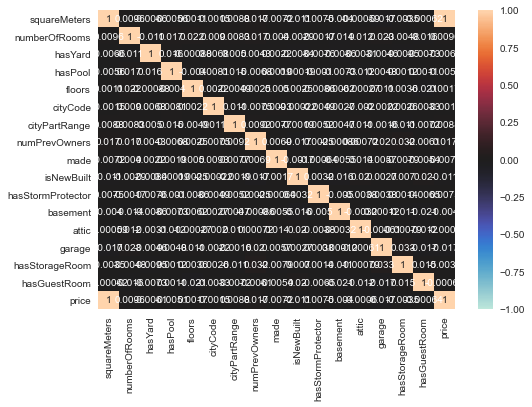

In [137]:
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, center=0)

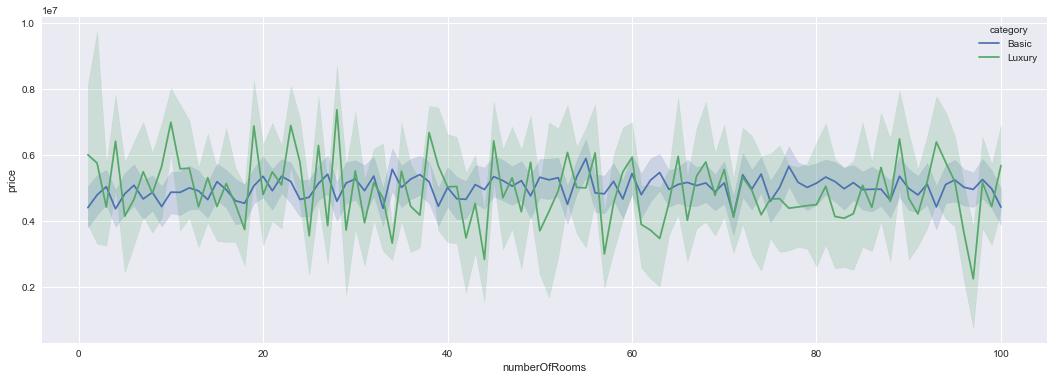

In [29]:
# Lineplot antara jumlah ruangan dan price terhadap tipe rumah
plt.figure(figsize=(18,6))
sns.lineplot(data= df, x='numberOfRooms', y='price', hue='category')

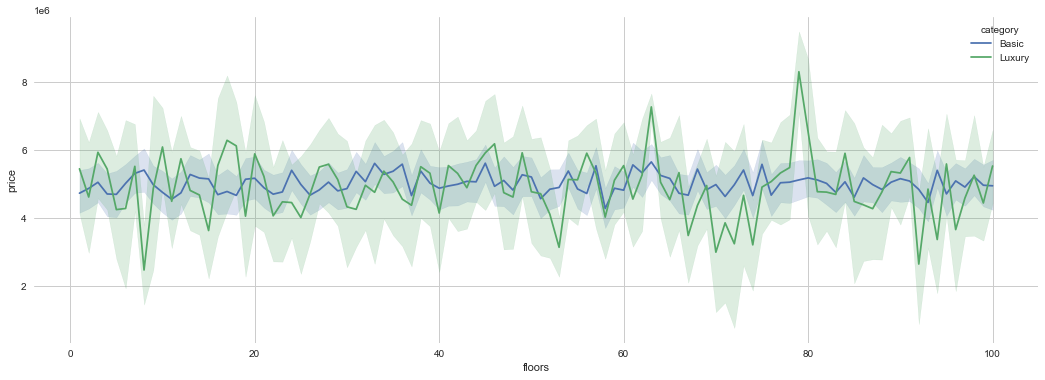

In [136]:
plt.figure(figsize=(18,6))
sns.lineplot(data= df, x='floors', y='price', hue='category')

**Berdasarkan Multi Variate Analysis diatas bisa dilihat bahwa hubungan jumlah ruangan atau luas lantai tidak terlalu menentukan apakah rumah tersebut Basic atau Luxury, untuk harga dari basic kira-kira ada di harga 4M - 6M, untuk Luxury sendiri ternyata harganya tidak menentu, bisa di antara 3M - 8M.** 

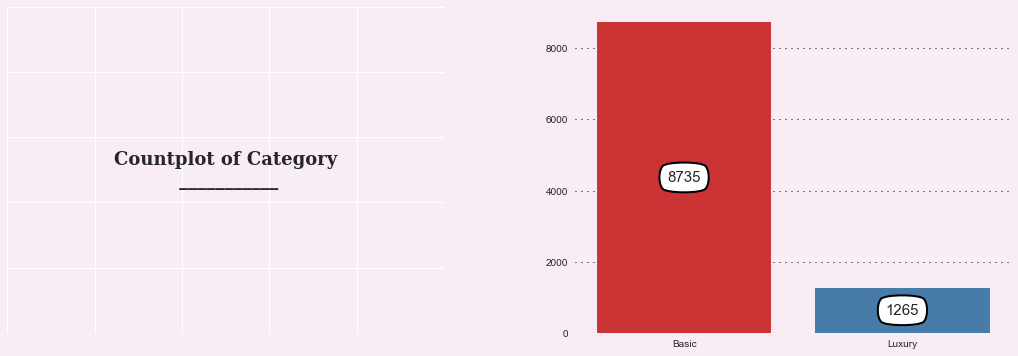

In [45]:
background_color = '#F8EDF4'
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

axes = [ax0, ax1]
fig.patch.set_facecolor(background_color)

#Title
ax0.text(0.5, 0.5, 'Countplot of Category\n _________________',
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18, fontfamily = 'serif', fontweight='bold')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.spines['bottom'].set_visible(False)

#Graph
plots = sns.countplot(data = df, x='category', ax=ax1, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel('')
ax1.set_ylabel('')

#Settings
for ax in axes :
    ax.set_facecolor(background_color)
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

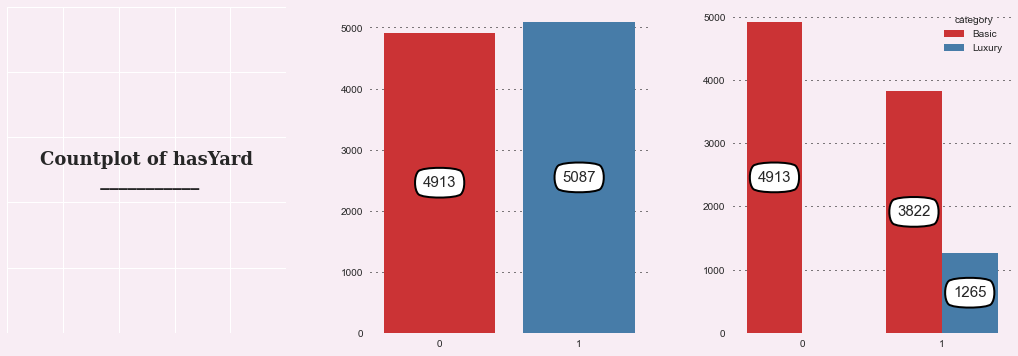

In [46]:
background_color = '#F8EDF4'
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.3)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

axes = [ax0, ax1, ax2]
fig.patch.set_facecolor(background_color)

#Title
ax0.text(0.5, 0.5, 'Countplot of hasYard\n __________________',
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18, fontfamily = 'serif', fontweight='bold')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.spines['bottom'].set_visible(False)

#Graph1
plots = sns.countplot(data = df, x='hasYard', ax=ax1, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel('')
ax1.set_ylabel('')

#Graph2
plots = sns.countplot(data = df, x='hasYard', hue='category', ax=ax2, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_xlabel('')
ax2.set_ylabel('')

#Settings
for ax in axes :
    ax.set_facecolor(background_color)
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

**Berdasarkan hasil Countplot diatas terhadap hasYard(Apakah Rumah tersebut mempunyai perkarangan), berdasarkan hasil bisa dilihat bahwa data cukup seimbang dengan yang mempunyai perkarangan lebih banyak sedikit, untuk apakah tipe nya basic atau luxury, hanya 1265 rumah luxury yang mempunyai perkarangan.**

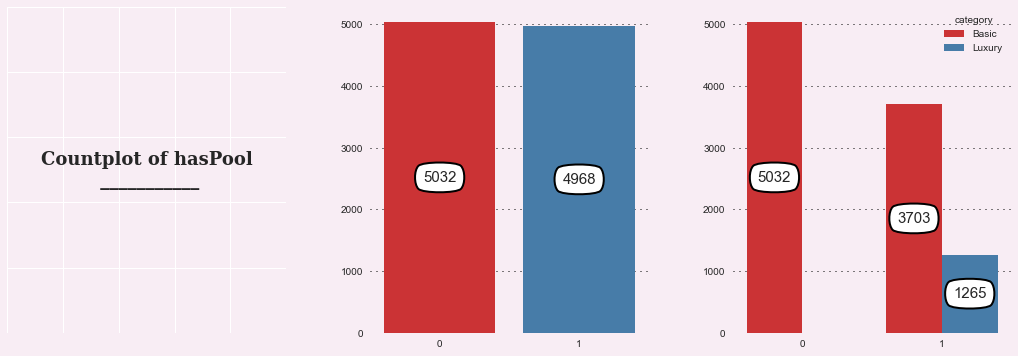

In [44]:
background_color = '#F8EDF4'
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.3)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

axes = [ax0, ax1, ax2]
fig.patch.set_facecolor(background_color)

#Title
ax0.text(0.5, 0.5, 'Countplot of hasPool\n __________________',
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18, fontfamily = 'serif', fontweight='bold')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.spines['bottom'].set_visible(False)

#Graph1
plots = sns.countplot(data = df, x='hasPool', ax=ax1, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel('')
ax1.set_ylabel('')

#Graph2
plots = sns.countplot(data = df, x='hasPool', hue='category', ax=ax2, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_xlabel('')
ax2.set_ylabel('')

#Settings
for ax in axes :
    ax.set_facecolor(background_color)
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

**Berdasarkan hasil Countplot diatas terhadap hasPool(Apakah Rumah tersebut mempunyai kolam renang), berdasarkan hasil bisa dilihat bahwa data cukup seimbang dengan yang tidak mempunyai kolam renang lebih banyak sedikit, untuk apakah tipe nya basic atau luxury, hanya 1265 rumah luxury yang mempunyai perkarangan.**

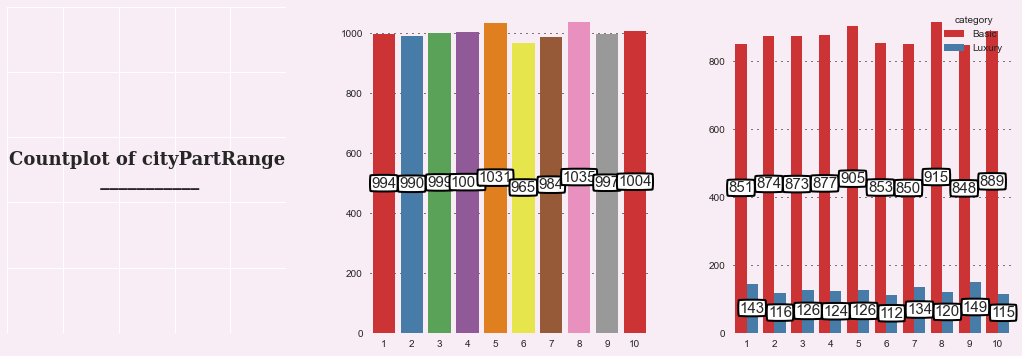

In [52]:
background_color = '#F8EDF4'
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.3)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

axes = [ax0, ax1, ax2]
fig.patch.set_facecolor(background_color)

#Title
ax0.text(0.5, 0.5, 'Countplot of cityPartRange\n ________________',
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18, fontfamily = 'serif', fontweight='bold')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.spines['bottom'].set_visible(False)

#Graph1
plots = sns.countplot(data = df, x='cityPartRange', ax=ax1, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.1", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel('')
ax1.set_ylabel('')

#Graph2
plots = sns.countplot(data = df, x='cityPartRange', hue='category', ax=ax2, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.1", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_xlabel('')
ax2.set_ylabel('')

#Settings
for ax in axes :
    ax.set_facecolor(background_color)
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

**Berdasarkan hasil Countplot diatas terhadap cityPartRange(Jarak antar Rumah), berdasarkan hasil bisa dilihat bahwa data cukup seimbang jarak antar rumah dari 1-10, begitupun dengan bila dikategorikan antara basic atau luxury.**

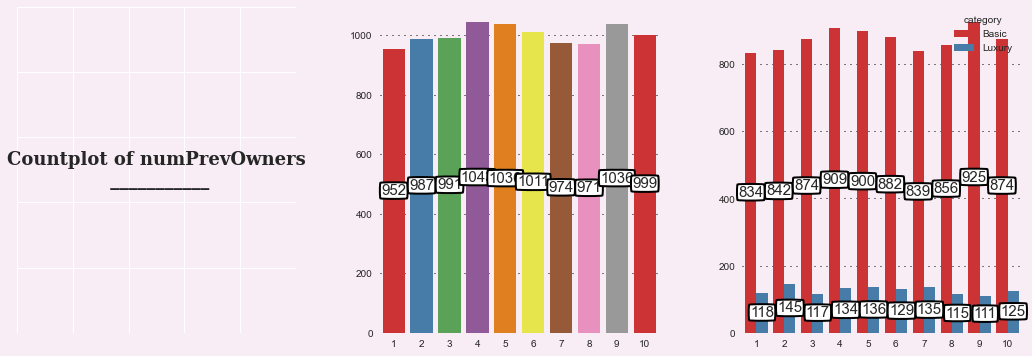

In [55]:
background_color = '#F8EDF4'
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.3)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

axes = [ax0, ax1, ax2]
fig.patch.set_facecolor(background_color)

#Title
ax0.text(0.5, 0.5, 'Countplot of numPrevOwners\n __________________',
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18, fontfamily = 'serif', fontweight='bold')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.spines['bottom'].set_visible(False)

#Graph1
plots = sns.countplot(data = df, x='numPrevOwners', ax=ax1, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.1", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel('')
ax1.set_ylabel('')

#Graph2
plots = sns.countplot(data = df, x='numPrevOwners', hue='category', ax=ax2, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.1", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_xlabel('')
ax2.set_ylabel('')

#Settings
for ax in axes :
    ax.set_facecolor(background_color)
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

**Berdasarkan hasil Countplot diatas terhadap numPrevOwners(Jumlah pemilik rumah sebelumnya), berdasarkan hasil bisa dilihat bahwa data cukup seimbang pemilik rumah sebelumnyadari 1-10, begitupun dengan bila dikategorikan antara basic atau luxury.**

In [56]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,squareMeters,int64,0,0.0,9483,"[77043, 38535, 29273]",94.83
1,numberOfRooms,int64,0,0.0,100,"[2, 93, 78]",1.00
2,hasYard,int64,0,0.0,2,[1],0.02
3,hasPool,int64,0,0.0,2,"[1, 0]",0.02
4,floors,int64,0,0.0,100,"[8, 11, 40]",1.00
5,cityCode,int64,0,0.0,9509,"[19698, 39980, 16595]",95.09
6,cityPartRange,int64,0,0.0,10,"[5, 3, 10]",0.10
7,numPrevOwners,int64,0,0.0,10,"[6, 1]",0.10
8,made,int64,0,0.0,32,"[2020, 2004, 2005]",0.32
9,isNewBuilt,int64,0,0.0,2,[1],0.02


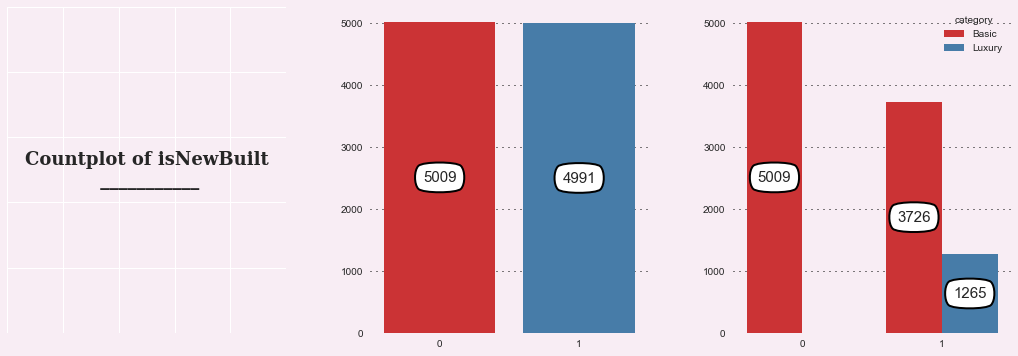

In [57]:
background_color = '#F8EDF4'
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.3)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

axes = [ax0, ax1, ax2]
fig.patch.set_facecolor(background_color)

#Title
ax0.text(0.5, 0.5, 'Countplot of isNewBuilt\n ___________________',
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18, fontfamily = 'serif', fontweight='bold')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.spines['bottom'].set_visible(False)

#Graph1
plots = sns.countplot(data = df, x='isNewBuilt', ax=ax1, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel('')
ax1.set_ylabel('')

#Graph2
plots = sns.countplot(data = df, x='isNewBuilt', hue='category', ax=ax2, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_xlabel('')
ax2.set_ylabel('')

#Settings
for ax in axes :
    ax.set_facecolor(background_color)
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

**Berdasarkan hasil Countplot diatas terhadap isNewBuilt(Apakah Rumah tersebut baru dibangun atau sudah lama), berdasarkan hasil bisa dilihat bahwa data seimbang antara yang baru terbangun atau sudah lama, bila dipisahkan dengan tipe kategori basic atau luxury, bisa dilihat bahwa kategori luxury itu semua nya adalah bangunan baru.**

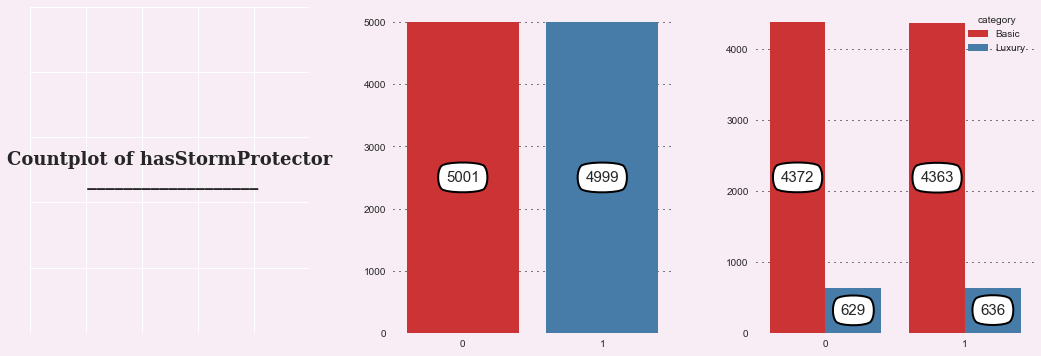

In [58]:
background_color = '#F8EDF4'
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.3)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

axes = [ax0, ax1, ax2]
fig.patch.set_facecolor(background_color)

#Title
ax0.text(0.5, 0.5, 'Countplot of hasStormProtector\n ___________________',
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18, fontfamily = 'serif', fontweight='bold')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.spines['bottom'].set_visible(False)

#Graph1
plots = sns.countplot(data = df, x='hasStormProtector', ax=ax1, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel('')
ax1.set_ylabel('')

#Graph2
plots = sns.countplot(data = df, x='hasStormProtector', hue='category', ax=ax2, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_xlabel('')
ax2.set_ylabel('')

#Settings
for ax in axes :
    ax.set_facecolor(background_color)
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

**Berdasarkan hasil Countplot diatas terhadap hasStormProtector(Apakah mempunyai pelindung dari Badai), berdasarkan hasil bisa dilihat bahwa data seimbang yang mempunyai pelindung atau tidak, begitupun dengan bila dikategorikan antara basic atau luxury seimbang dari yang mempunyai pelindung atau tidak.**

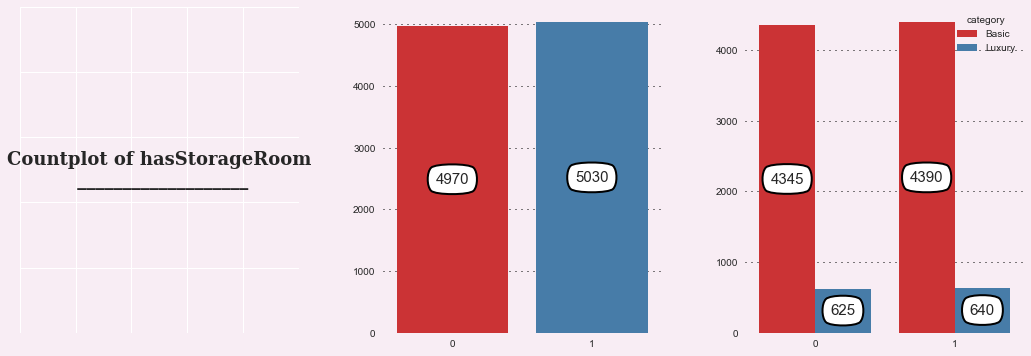

In [59]:
background_color = '#F8EDF4'
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.3)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

axes = [ax0, ax1, ax2]
fig.patch.set_facecolor(background_color)

#Title
ax0.text(0.5, 0.5, 'Countplot of hasStorageRoom\n ___________________',
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18, fontfamily = 'serif', fontweight='bold')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.spines['bottom'].set_visible(False)

#Graph1
plots = sns.countplot(data = df, x='hasStorageRoom', ax=ax1, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel('')
ax1.set_ylabel('')

#Graph2
plots = sns.countplot(data = df, x='hasStorageRoom', hue='category', ax=ax2, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_xlabel('')
ax2.set_ylabel('')

#Settings
for ax in axes :
    ax.set_facecolor(background_color)
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

**Berdasarkan hasil Countplot diatas terhadap hasStorageRoom(Apakah punya gudang atau tidak), berdasarkan hasil bisa dilihat bahwa data seimbang antara yang mempunyai gudang atau tidak, begitupun dengan bila dikategorikan antara basic atau luxury cukup seimbang antara yang tidak punya gudang atau tidak.**

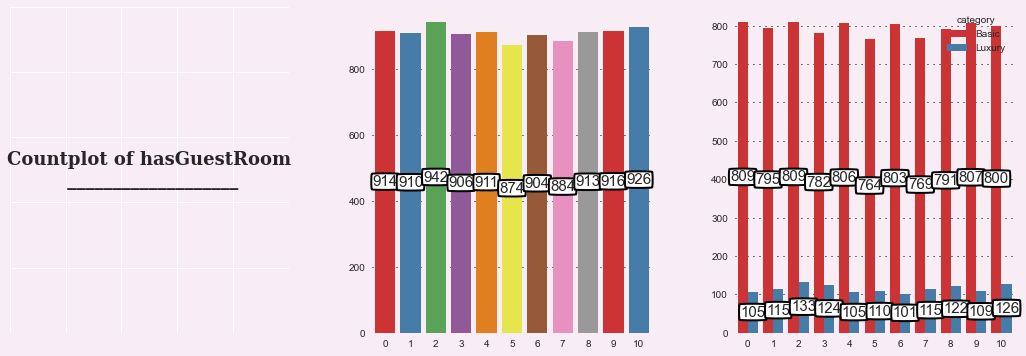

In [61]:
background_color = '#F8EDF4'
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.3)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

axes = [ax0, ax1, ax2]
fig.patch.set_facecolor(background_color)

#Title
ax0.text(0.5, 0.5, 'Countplot of hasGuestRoom\n ___________________',
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18, fontfamily = 'serif', fontweight='bold')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.spines['bottom'].set_visible(False)

#Graph1
plots = sns.countplot(data = df, x='hasGuestRoom', ax=ax1, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.1", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel('')
ax1.set_ylabel('')

#Graph2
plots = sns.countplot(data = df, x='hasGuestRoom', hue='category', ax=ax2, palette="Set1")
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.1", fc="w", ec="black", lw=2),
                   textcoords='offset points')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_xlabel('')
ax2.set_ylabel('')

#Settings
for ax in axes :
    ax.set_facecolor(background_color)
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

**Berdasarkan hasil Countplot diatas terhadap hasGuestRoom(Jumlah Ruang Tamu), berdasarkan hasil bisa dilihat bahwa data cukup seimbang dari jumlah ruang tamu, begitupun dengan bila dikategorikan antara basic atau luxury juga cukup seimbang.**

## Feature Engineering

In [146]:
# Merubah fitur catergory dengan label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])

In [147]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1


In [148]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,squareMeters,int64,0,0.0,9483,"[9026, 55872, 43588]",94.83
1,numberOfRooms,int64,0,0.0,100,"[93, 66, 59]",1.00
2,hasYard,int64,0,0.0,2,"[1, 0]",0.02
3,hasPool,int64,0,0.0,2,"[0, 1]",0.02
4,floors,int64,0,0.0,100,"[93, 91, 11]",1.00
5,cityCode,int64,0,0.0,9509,"[84602, 90218, 54877]",95.09
6,cityPartRange,int64,0,0.0,10,"[10, 8, 3]",0.10
7,numPrevOwners,int64,0,0.0,10,"[2, 7]",0.10
8,made,int64,0,0.0,32,"[2021, 1991, 2009]",0.32
9,isNewBuilt,int64,0,0.0,2,[1],0.02


In [72]:
# Train split test
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix, classification_report
X = df.drop(columns=['category'])
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [73]:
# Mengatasi Imbalanced pada kolom label
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
sm = SMOTE(random_state = 5) 
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train) #transform to SM (SMOTE)
 
print('After OverSampling, the shape of x1_train_sm: {}'.format(X_train_sm.shape)) 
print('After OverSampling, the shape of y1_train_sm: {} \n'.format(y_train_sm.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

Before OverSampling, counts of label '1': 1012
Before OverSampling, counts of label '0': 6988 

After OverSampling, the shape of x1_train_sm: (13976, 17)
After OverSampling, the shape of y1_train_sm: (13976,) 

After OverSampling, counts of label '1': 6988
After OverSampling, counts of label '0': 6988


## Machine Learning Classification

### XGBOOST Classifier

[10:44:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1747
           1       1.00      1.00      1.00       253

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


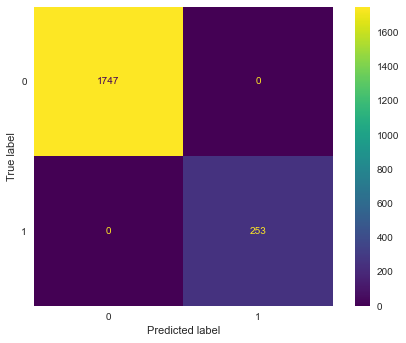

In [75]:
from xgboost import XGBRFClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
xgb_fit = XGBRFClassifier(random_state=42).fit(X_train_sm, y_train_sm)

pred_xgb = xgb_fit.predict(X_test)
print(classification_report(y_test, pred_xgb))

plot_confusion_matrix(estimator=xgb_fit, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

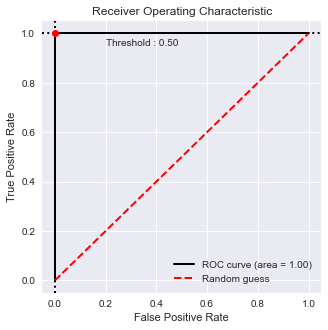

In [76]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, pred_xgb, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [138]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train_sm.columns, 
                                     'Score':xgb_fit.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
9,isNewBuilt,0.400495
3,hasPool,0.321566
2,hasYard,0.226318
14,hasStorageRoom,0.016485
10,hasStormProtector,0.012617


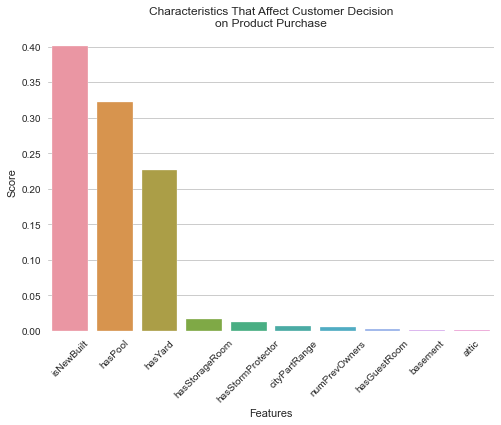

In [139]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

In [77]:
# import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# models
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
nb = GaussianNB()
# modeling
models = [rf, svm, lr, dt, knn, nb]

for model in models:
    model.fit(X_train_sm, y_train_sm)

In [78]:
# Evaluation
ypred_rf = rf.predict(X_test)
ypred_svm = svm.predict(X_test)
ypred_lr = lr.predict(X_test)
ypred_dt = dt.predict(X_test)
ypred_knn = knn.predict(X_test)
ypred_nb = nb.predict(X_test)

### Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1747
           1       1.00      1.00      1.00       253

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



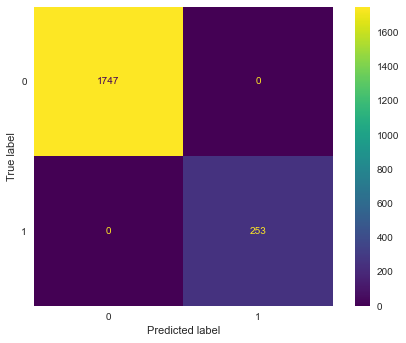

In [79]:
print(classification_report(y_test, ypred_rf))
plot_confusion_matrix(estimator=rf, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

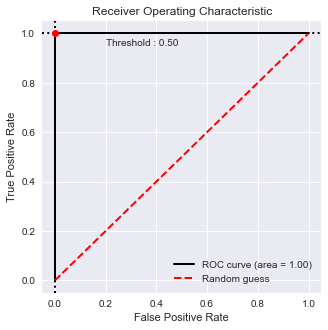

In [80]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_rf, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [81]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train_sm.columns, 
                                     'Score':rf.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
9,isNewBuilt,0.325333
3,hasPool,0.302483
2,hasYard,0.288621
14,hasStorageRoom,0.013762
10,hasStormProtector,0.010936


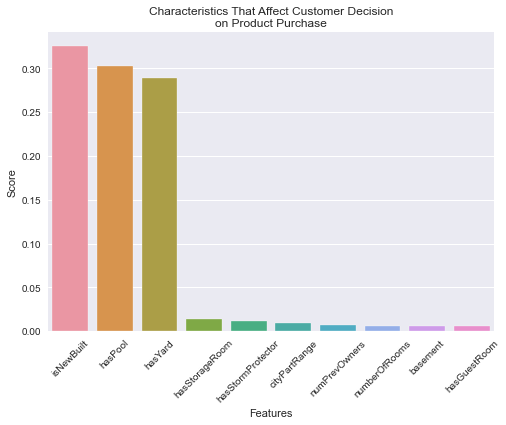

In [82]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

### Decision Tree Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1747
           1       1.00      1.00      1.00       253

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



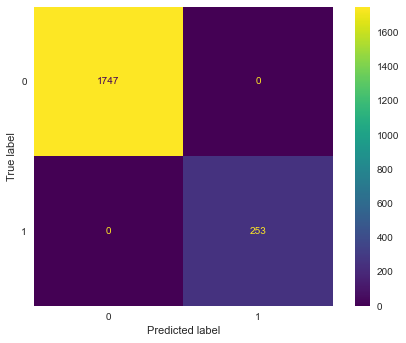

In [85]:
print(classification_report(y_test, ypred_dt))
plot_confusion_matrix(estimator=dt, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

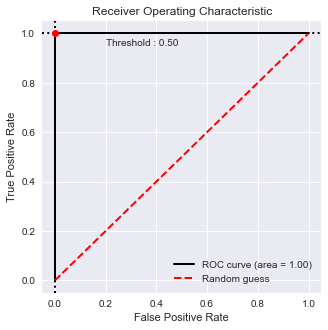

In [86]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_dt, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [87]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train_sm.columns, 'Score':dt.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
9,isNewBuilt,0.404623
2,hasYard,0.348513
3,hasPool,0.246864
0,squareMeters,0.000000
10,hasStormProtector,0.000000


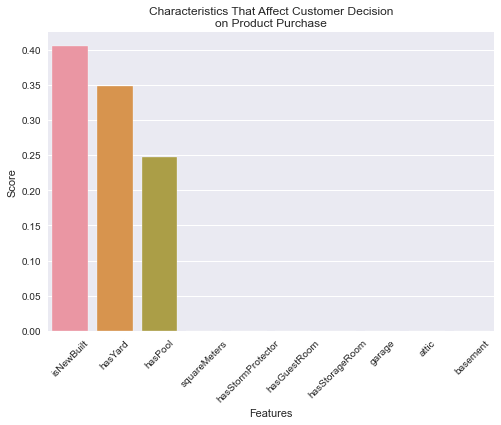

In [88]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

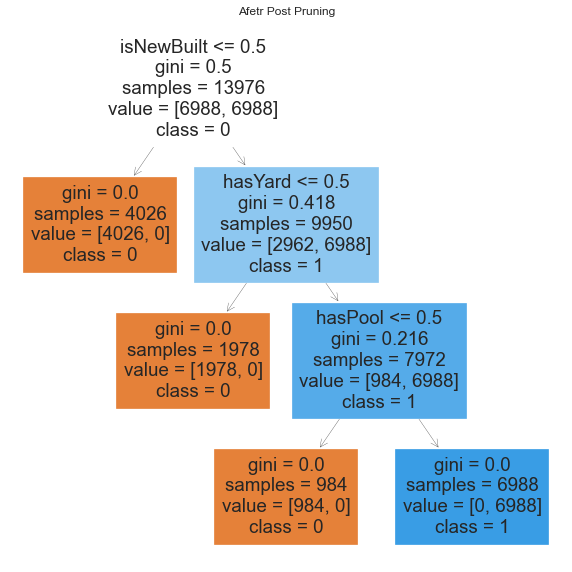

In [89]:
from sklearn import tree
plt.figure(figsize=(10,10))
features = X.columns
classes = ['0','1']
tree.plot_tree(dt,feature_names=features,class_names=classes,filled=True)
plt.title('Afetr Post Pruning')
plt.show()

### Support Vector Machine

              precision    recall  f1-score   support

           0       0.87      0.40      0.55      1747
           1       0.13      0.60      0.21       253

    accuracy                           0.43      2000
   macro avg       0.50      0.50      0.38      2000
weighted avg       0.78      0.43      0.51      2000



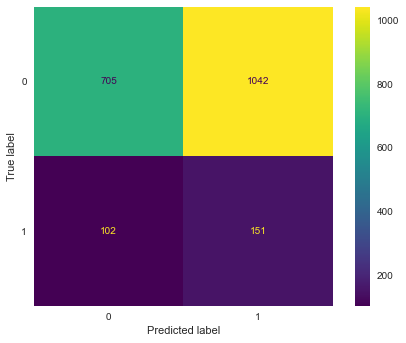

In [83]:
print(classification_report(y_test, ypred_svm))
plot_confusion_matrix(estimator=svm, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

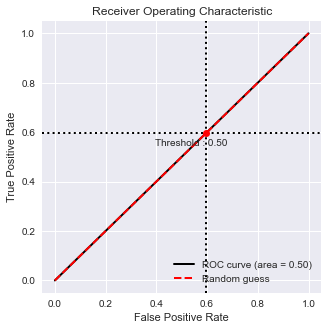

In [84]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_svm, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Logistic Regression

              precision    recall  f1-score   support

           0       0.87      0.54      0.67      1747
           1       0.13      0.45      0.20       253

    accuracy                           0.53      2000
   macro avg       0.50      0.50      0.43      2000
weighted avg       0.78      0.53      0.61      2000



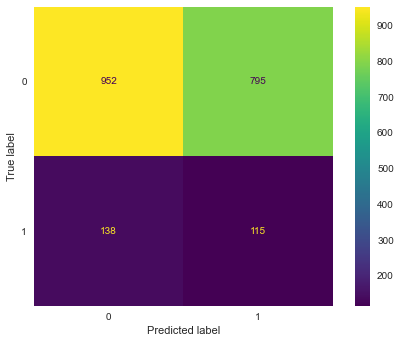

In [90]:
print(classification_report(y_test, ypred_lr))
plot_confusion_matrix(estimator=lr, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

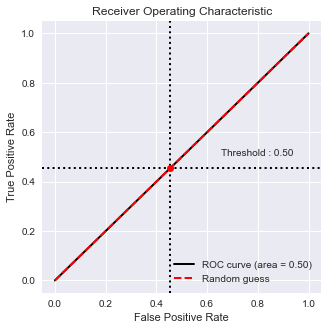

In [91]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_lr, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### K-Nearest Neighbour

              precision    recall  f1-score   support

           0       0.87      0.61      0.71      1747
           1       0.12      0.36      0.18       253

    accuracy                           0.58      2000
   macro avg       0.49      0.48      0.45      2000
weighted avg       0.77      0.58      0.65      2000



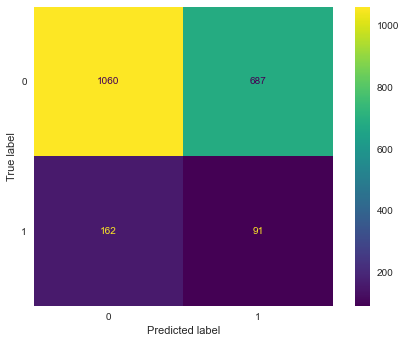

In [92]:
print(classification_report(y_test, ypred_knn))
plot_confusion_matrix(estimator=knn, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

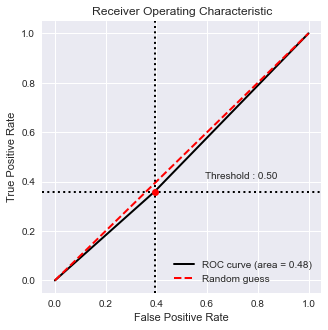

In [93]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_knn, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Naive Bayes

              precision    recall  f1-score   support

           0       0.87      0.56      0.68      1747
           1       0.13      0.44      0.20       253

    accuracy                           0.54      2000
   macro avg       0.50      0.50      0.44      2000
weighted avg       0.78      0.54      0.62      2000



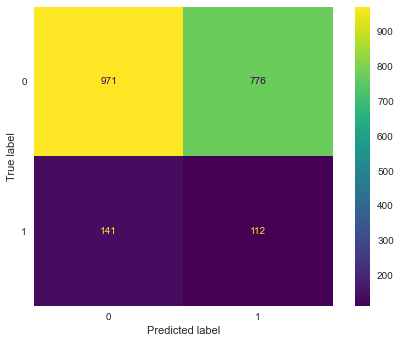

In [94]:
print(classification_report(y_test, ypred_nb))
plot_confusion_matrix(estimator=nb, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

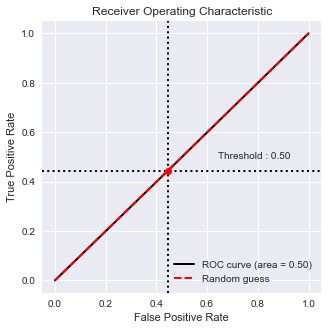

In [95]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_nb, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Kesimpulan Classification

Berdasarkan hasil dari berbagai model, model yang bisa digunakan dalam klasifikasi rumah kategori Basic atau Luxury dengan :

1) XGBOOST Classifier

2) Random Forest Classifier

3) Decision Tree Classifier

## Machine Learning Regression

In [97]:
# Melihat korelasi semua fitur dengan fitur category
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
isNewBuilt          -0.010643
category            -0.011399
garage              -0.017229
Name: price, dtype: float64

### Linear Regression

In [98]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [99]:
#Membuat X dan y
X_mlr_2 = df.drop(columns='price')
y_mlr_2 = df[['price']]

In [100]:
# Splitting Data Training Set dan Testing Set
X_train, X_test, y_train, y_test = train_test_split(X_mlr_2, y_mlr_2, test_size=0.2, random_state=42)

In [101]:
print(y_train.shape)
print(y_test.shape)

(8000, 1)
(2000, 1)


In [102]:
import statsmodels.api as sm
from sklearn import datasets
X_train2 = sm.add_constant(X_train)
X_test2 = sm.add_constant(X_test)

# Fit and make the predictions by the model
mlr = sm.OLS(y_train, X_train2).fit() # Ordinary least squares
predictions = mlr.predict(X_test2)

# Print out the statistics
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.071e+09
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:57:58   Log-Likelihood:                -71710.
No. Observations:                8000   AIC:                         1.435e+05
Df Residuals:                    7982   BIC:                         1.436e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6721.8515   4559.138      1.474      0.140   -2215.251    1.57e+04
squareMeters        100.0001      0.001   1.35e+05      0.000      99.999     100.002
numberOfRooms         0.2737      0.735      0.372      0.710      -1.168       1.715
hasYard            3003.7933     47.235     63.593      0.000    2911.201    3096.386
hasPool            3003.0703     47.269     63.531      0.000    2910.410    3095.730
floors               54.4635      0.732     74.401      0.000      53.029      55.898
cityCode             -0.0010      0.001     -1.310      0.190      -0.002       0.000
cityPartRange        50.4379      7.364      6.849      0.000      36.002      64.874
numPrevOwners         2.8023      7.406      0.378      0.705     -11.716      17.321
made                 -3.1885      2.273     -1.403      0.161      -7.645       1.268
isNewBuilt          138.2841     47.497      2.911      0.004      45.178     231.390
hasStormProtector   102.3447     42.340      2.417      0.016      19.347     185.342
basement             -0.0082      0.007     -1.108      0.268      -0.023       0.006
attic                -0.0076      0.007     -1.047      0.295      -0.022       0.007
garage                0.1012      0.081      1.252      0.210      -0.057       0.260
hasStorageRoom       41.8138     42.391      0.986      0.324     -41.283     124.911
hasGuestRoom         -6.3363      6.699     -0.946      0.344     -19.469       6.796
category            -40.1210     84.391     -0.475      0.635    -205.549     125.307
==============================================================================
Omnibus:                       12.259   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.505
Skew:                           0.004   Prob(JB):                     0.000708
Kurtosis:                       3.208   Cond. No.                     1.65e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
# Membuat model linear regression dan fit ke data training
model_lr = LinearRegression()
model_lr.fit(X_train, y_train) # Training step

LinearRegression()

In [105]:
# Model prediction on train data
y_pred_lr = model_lr.predict(X_train)
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_lr))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_lr))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_lr))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_lr)))

R^2: 0.9999995615523728
Adjusted R^2: 0.9999995606185705
MAE: 1470.7676641911064
MSE: 3575290.0994710214
RMSE: 1890.8437533204644


In [128]:
# Melihat hasil metric
y_pred_mlr_2 = model_lr.predict(X_test)
print('MSE :', metrics.mean_squared_error(y_test, y_pred_mlr_2))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr_2)))
print('MAE :', metrics.mean_absolute_error(y_test, y_pred_mlr_2))
print('R^2 :', model_lr.score(X_test,y_test))
acc_mlr2 = model_lr.score(X_test, y_test)
rmse_mlr2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr_2))

MSE : 3695983.4580854406
RMSE : 1922.4940723147733
MAE : 1510.0006266973203
R^2 : 0.9999995780241576


In [106]:
# Membandingkan hasil price dengan hasil prediksi
compare_mlr = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_lr, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['price']-compare_mlr['Prediction']
compare_mlr.head(20)

,price,Prediction
0,7964369.6,8.156892e+06
1,3713548.9,7.878303e+06
2,8553019.2,7.812716e+06
3,6428666.2,1.579184e+06
4,6465184.9,3.249243e+05
5,223041.3,2.865769e+06
6,1620468.0,9.691267e+06
7,8632872.8,2.087462e+06
8,6192576.5,8.247422e+06
9,3299047.8,3.474292e+06


In [125]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_mlr['price']-compare_mlr['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9134455301361073
Little to no autocorrelation 

Assumption satisfied


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 1.855136985051483e-05
Residuals are not normally distributed


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


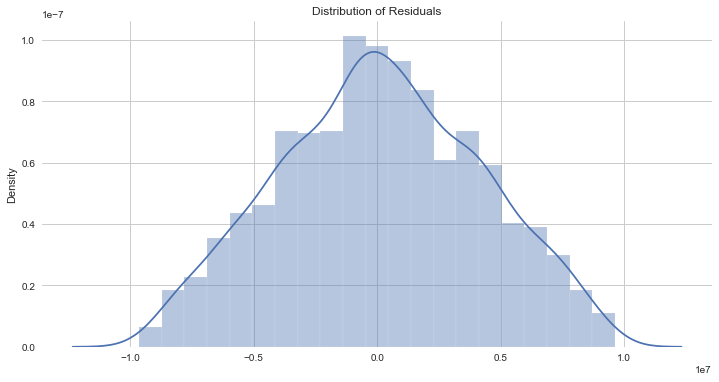


Assumption not satisfied


In [126]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_mlr['price']-compare_mlr['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_mlr['price']-compare_mlr['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

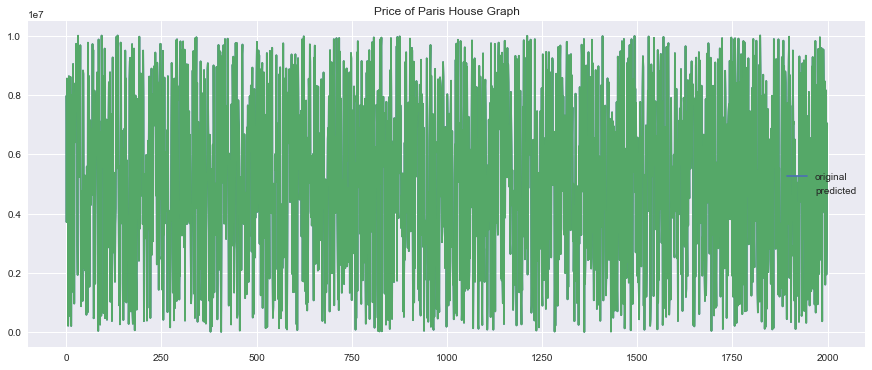

In [108]:
# Melihat grafik perbedaan antara data actual dan data prediksi
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_mlr_2, label="predicted")
plt.title("Price of Paris House Graph")
plt.legend()
plt.show()

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [141]:
print('intercept:', model_lr.intercept_[0])
print('b1:',model_lr.coef_[0][0]) # squareMeters
print('b2:',model_lr.coef_[0][1]) # numberofRooms
print('b3:',model_lr.coef_[0][2]) # hasYard
print('b4:',model_lr.coef_[0][3]) # hasPool
print('b5:',model_lr.coef_[0][4]) # floors
print('b6:',model_lr.coef_[0][5]) # cityCode
print('b7:',model_lr.coef_[0][6]) # cityPartRange
print('b8:',model_lr.coef_[0][7]) # numPrevOwners
print('b9:',model_lr.coef_[0][8]) # made
print('b10:',model_lr.coef_[0][9]) # isNewBuilt
print('b11:',model_lr.coef_[0][10]) # hasStormProtector
print('b12:',model_lr.coef_[0][11]) # basement
print('b13:',model_lr.coef_[0][12]) # garage
print('b14:',model_lr.coef_[0][13]) # hasStorageRoom
print('b15:',model_lr.coef_[0][14]) # hasGuestRoom
print('b16:',model_lr.coef_[0][15]) # category




intercept: 6721.85148953367
b1: 100.00007940248533
b2: 0.2737136136987908
b3: 3003.7932568810097
b4: 3003.070269953224
b5: 54.463491690361444
b6: -0.0009598633555104874
b7: 50.43787868504712
b8: 2.802255557281071
b9: -3.188526799520848
b10: 138.28414361550625
b11: 102.34471401485362
b12: -0.008151534556584072
b13: -0.007644123901294356
b14: 0.10118528701034851
b15: 41.81377482885821
b16: -6.336310069118936


In [142]:
# Membuat fungsi kekuatan beton terhadap volume semen
def prediksi_harga_rumah(sm, nr, hy, hp, f, cc,cpr, npo, m, inb, hsp,b,g, hsr, hgr, c):
    return model_lr.coef_[0][0] * sm + model_lr.coef_[0][1] * nr + model_lr.coef_[0][2] * hy + model_lr.coef_[0][3] * hp + model_lr.coef_[0][4] * f + model_lr.coef_[0][5] * cc + model_lr.coef_[0][6] *cpr+ model_lr.coef_[0][7] * npo+ model_lr.coef_[0][8] * m+ model_lr.coef_[0][9] * inb + model_lr.coef_[0][10] * hsp + model_lr.coef_[0][11] * b + model_lr.coef_[0][12] * g + model_lr.coef_[0][13] *hsr +model_lr.coef_[0][14] * hgr + model_lr.coef_[0][15] * c + model_lr.intercept_[0] 

In [149]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,squareMeters,int64,0,0.0,9483,"[99683, 74263, 99145]",94.83
1,numberOfRooms,int64,0,0.0,100,"[54, 78, 41]",1.00
2,hasYard,int64,0,0.0,2,[1],0.02
3,hasPool,int64,0,0.0,2,"[1, 0]",0.02
4,floors,int64,0,0.0,100,"[8, 28, 67]",1.00
5,cityCode,int64,0,0.0,9509,"[94120, 23304, 29281]",95.09
6,cityPartRange,int64,0,0.0,10,"[5, 7, 2]",0.10
7,numPrevOwners,int64,0,0.0,10,"[3, 1, 10]",0.10
8,made,int64,0,0.0,32,"[1991, 2009, 1992]",0.32
9,isNewBuilt,int64,0,0.0,2,"[1, 0]",0.02


In [150]:
sm = int(input())
nr = int(input())
hy = int(input())
hp = int(input())
f = int(input())
cc = int(input())
cpr = int(input())
npo = int(input())
m = int(input())
inb = int(input())
hsp = int(input())
b = int(input())
g = int(input())
hsr = int(input())
hgr = int(input())
c = int(input())


prediksi_harga_rumah(sm, nr, hy, hp, f, cc,cpr, npo, m, inb, hsp,b,g, hsr, hgr, c)

50000
50
1
1
72
23304
5
5
2017
1
0
5000
4343
700
1
5


5010625.605650086

### Random Forest Regression

In [109]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

<ipython-input-109-42db2652d05a>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


RandomForestRegressor()

In [110]:
# Model prediction on train data
y_pred_rfg = reg.predict(X_train)
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_rfg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_rfg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_rfg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_rfg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_rfg)))

R^2: 0.9999997390236451
Adjusted R^2: 0.9999997384678198
MAE: 1155.516258250096
MSE: 2128113.1876196736
RMSE: 1458.8053974467168


In [130]:
# Prediksi tes data dengan model
y_test_pred_rfg = reg.predict(X_test)
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred_rfg)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_rfg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_rfg))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_rfg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfg)))
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfg))

R^2: 0.9999981614450286
Adjusted R^2: 0.9999981456753846
MAE: 3190.176560999853
MSE: 16103454.459723927
RMSE: 4012.910970819553


In [112]:
compare_rfg = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_rfg, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['price']-compare_mlr['Prediction']
compare_rfg.head(20)

,price,Prediction
0,7964369.6,8157748.224
1,3713548.9,7880453.270
2,8553019.2,7813157.419
3,6428666.2,1578034.832
4,6465184.9,324454.535
5,223041.3,2866005.153
6,1620468.0,9690352.385
7,8632872.8,2086048.811
8,6192576.5,8245199.236
9,3299047.8,3475107.484


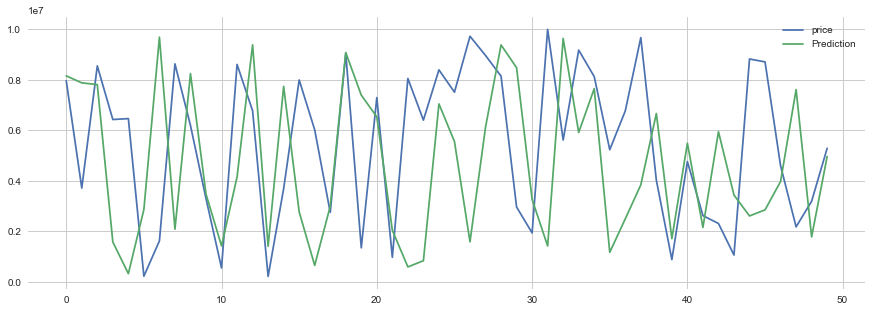

In [114]:
sns.set_style('whitegrid')
compare_rfg.head(50).plot(kind='line', figsize=(15, 5))

In [113]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':reg.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
0,squareMeters,9.999988e-01
4,floors,1.372722e-07
5,cityCode,1.200872e-07
12,attic,1.200766e-07
11,basement,1.117125e-07


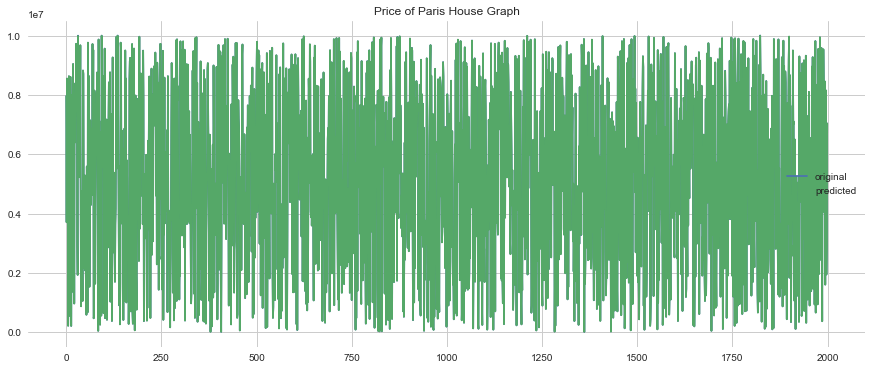

In [115]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_rfg, label="predicted")
plt.title("Price of Paris House Graph")
plt.legend()
plt.show()

### XGBOOST Regression

In [116]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xbreg = XGBRegressor()

# Train the model using the training sets 
xbreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
# Model prediction on train data
y_pred_xg = xbreg.predict(X_train)
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_xg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_xg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_xg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_xg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_xg)))

E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


R^2: 0.9999949027971589
Adjusted R^2: 0.9999948919411769
MAE: 4843.593776782224
MSE: 41564779.28521019
RMSE: 6447.075250469021


In [118]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':xbreg.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
0,squareMeters,0.999903
16,category,0.000008
11,basement,0.000008
3,hasPool,0.000007
12,attic,0.000007


In [119]:
compare_xg = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_xg, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['price']-compare_mlr['Prediction']
compare_xg.head(20)

,price,Prediction
0,7964369.6,8.155293e+06
1,3713548.9,7.879075e+06
2,8553019.2,7.810728e+06
3,6428666.2,1.580869e+06
4,6465184.9,3.318893e+05
5,223041.3,2.860583e+06
6,1620468.0,9.703156e+06
7,8632872.8,2.089626e+06
8,6192576.5,8.246717e+06
9,3299047.8,3.473769e+06


In [120]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_xg['price']-compare_xg['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9135226536735823
Little to no autocorrelation 

Assumption satisfied


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 1.841733165226339e-05
Residuals are not normally distributed


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


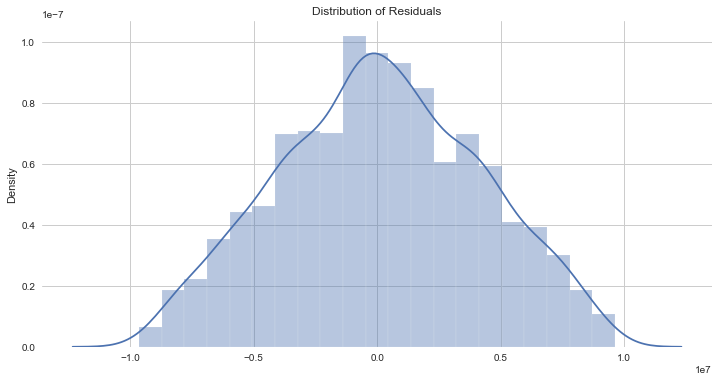


Assumption not satisfied


In [121]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_xg['price']-compare_xg['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_xg['price']-compare_xg['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

In [122]:
# Prediksi tes data dengan model
y_test_pred_xg = xbreg.predict(X_test)
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred_xg)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_xg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_xg))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_xg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xg)))
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xg))

R^2: 0.9999883280761062
Adjusted R^2: 0.9999882279637418
MAE: 7897.461595507797
MSE: 102231533.89962316
RMSE: 10110.96107695125


E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


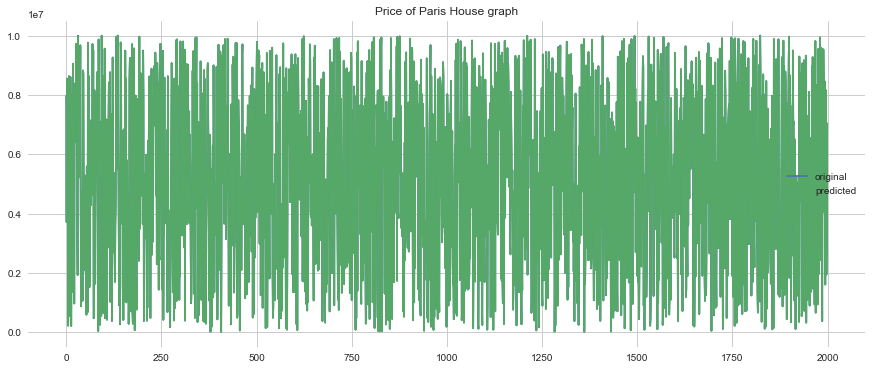

In [123]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_xg, label="predicted")
plt.title("Price of Paris House graph")
plt.legend()
plt.show()

In [124]:
# Membandingkan hasil dari modelling yang sudah dilakukan dari R^2 Score
models = pd.DataFrame({
    'Model': ['Multi Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_mlr2*100, acc_rf*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
0,Multi Linear Regression,99.999958
1,Random Forest,99.999816
2,XGBoost,99.998833


In [132]:
# Membandingkan hasil dari modelling yang sudah dilakukan dengan RMSE
models = pd.DataFrame({
    'Model': ['Multi Linear Regression','Random Forest', 'XGBoost'],
    'RMSE Score': [rmse_mlr2, rmse_rf, rmse_xgb]})
models.sort_values(by='RMSE Score', ascending=True)

,Model,RMSE Score
0,Multi Linear Regression,1922.494072
1,Random Forest,4012.910971
2,XGBoost,10110.961077


### Kesimpulan Machine Learning Regression

Berdasarkan hasil dari R^2 dan RMSE, model yang dipilih adalah 
### Linear Regression